Range of Tracks: 200
head pointer = 55
start point in the list is 51 

(51 - 55) + (46 - 51) + (32 - 46) + (73 - 32) + (87 - 73) + (90 - 87) + (105 - 90) + (124 - 105) + (159 - 124) + (182 - 159) = 173

total number of cylinders is 173
Average seek time : 17.3
Throughput : 0.057803468208092484

55 --> 51 --> 46 --> 32 --> 73 --> 87 --> 90 --> 105 --> 124 --> 159 --> 182

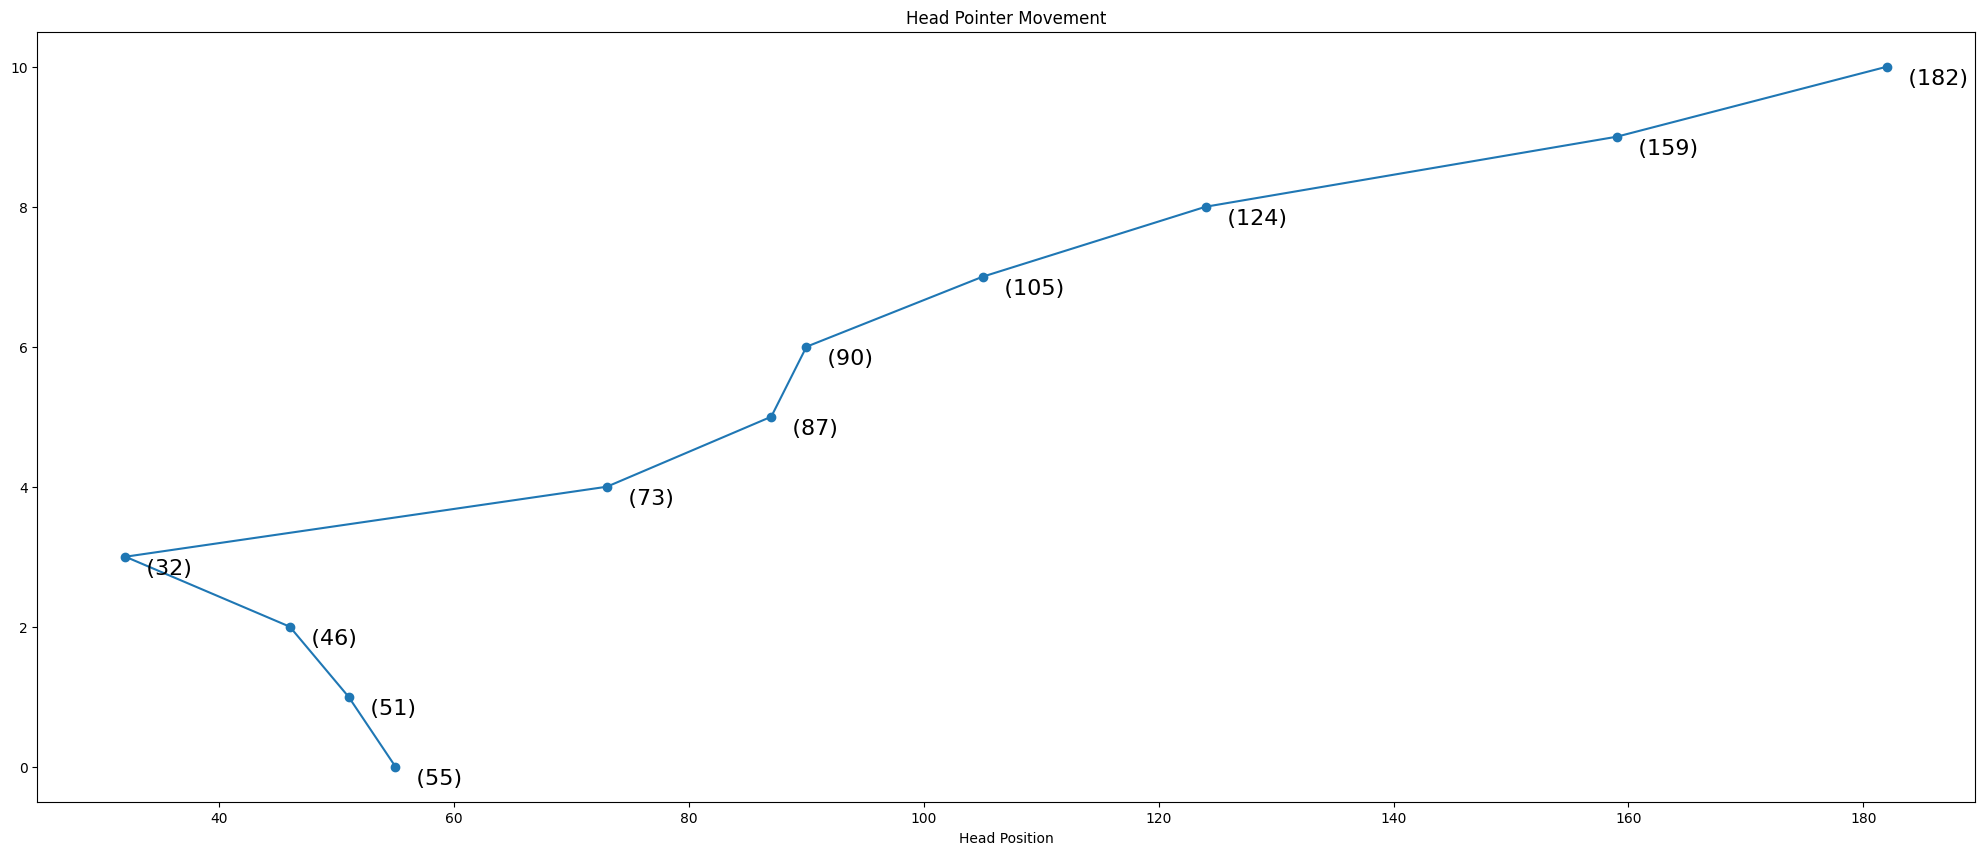

In [1]:
import matplotlib.pyplot as plt


print('Range of Tracks: 200')
tracks=[46, 124, 87, 159, 32, 182, 51, 105, 73, 90]
n = len(tracks)

head_pointer = 55
print(f'head pointer = {head_pointer}')
started = False
number_of_cylinders = []
head_positions = []
head_positions.append(head_pointer)


while tracks:
    sorted_tracks = sorted(tracks, key=lambda x: (abs(x - head_pointer), x))
        
    start_point = sorted_tracks[0] if not started else min(tracks, key=lambda x: (abs(x - head_pointer), x))
    print(f'start point in the list is {start_point} \n\n({start_point} - {head_pointer})', end=' + ') if not started else print(f'({start_point} - {head_pointer})', end=' + ' if len(tracks)> 1 else '')
    started = True
    
        
    number_of_cylinders.append(abs(start_point - head_pointer))
    tracks.remove(start_point)
    head_pointer = start_point
    head_positions.append(head_pointer)


print(f' = {sum(number_of_cylinders)}')
print()
print(f'total number of cylinders is {sum(number_of_cylinders)}')
print(f'Average seek time : {(sum(number_of_cylinders))/n}')
print(f'Throughput : {n/(sum(number_of_cylinders))}')
print()

for pointers in head_positions:
    print(f'{pointers}',end=' --> ' if pointers != head_positions[-1] else '')

time = range(len(head_positions))
plt.figure(figsize=(25, 10))
plt.plot(head_positions, time, marker='o') 

plt.xlabel('Head Position') 
plt.title('Head Pointer Movement')
for i, (pos, t) in enumerate(zip(head_positions, time)):
    plt.text(pos, t, f'\n   ({pos})', ha='left', va='center',fontsize = 16) 
plt.show()
